# Prediction Using Unsupervised ML

### Priyanka Sukale
Objective:From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

Attribute Information:
sepal length in cm
sepal width in cm
petal length in cm
petal width in cm
class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica


### Importing necessary libraries and reading Iris dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
iris = pd.read_csv("iris.csv")
iris_df = iris.iloc[:,[1,2,3,4,5]]     #Removing the "Id" Column
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

In [40]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [41]:
iris_df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [42]:
iris_setosa = iris_df.loc[iris_df['Species']=='Iris-setosa']
iris_versicolor = iris_df.loc[iris_df['Species']=='Iris-versicolor']
iris_virginica = iris_df.loc[iris_df['Species']=='Iris-virginica']

<function matplotlib.pyplot.show(*args, **kw)>

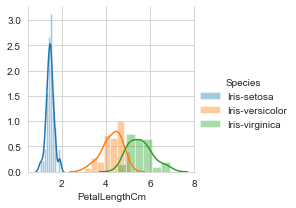

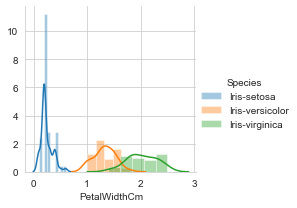

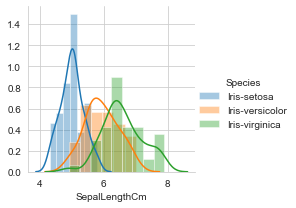

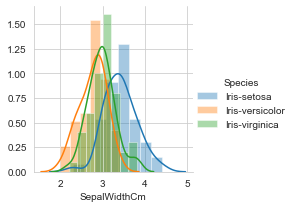

In [43]:
sns.FacetGrid(iris_df,hue="Species",height=3).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(iris_df,hue="Species",height=3).map(sns.distplot,"PetalWidthCm").add_legend()
sns.FacetGrid(iris_df,hue="Species",height=3).map(sns.distplot,"SepalLengthCm").add_legend()
sns.FacetGrid(iris_df,hue="Species",height=3).map(sns.distplot,"SepalWidthCm").add_legend()
plt.show

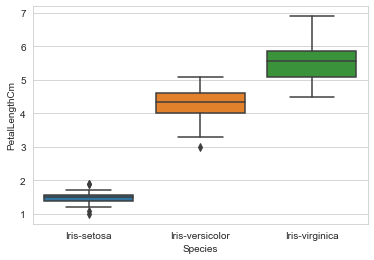

In [44]:
sns.boxplot(x="Species",y="PetalLengthCm",data=iris)

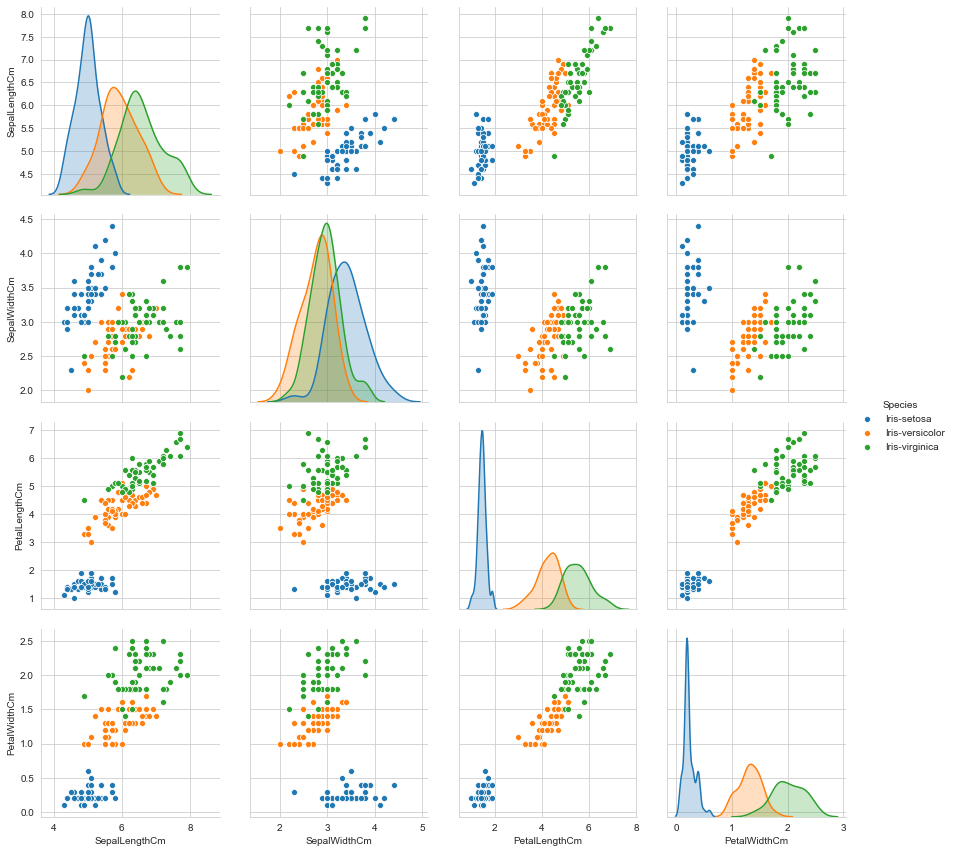

In [46]:
sns.set_style("whitegrid")
sns.pairplot(iris1,hue="Species",height=3);
plt.show()

In [47]:
# To find the optimum no. of clusters for K-means classification
X = iris_df.iloc[:,[0,1,2,3]].values


from sklearn.cluster import KMeans
wcss = []      #Sum of squared distances of samples obs to their closest cluster center.

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


## Using the elbow method to determine the optimal number of clusters for k-means clustering

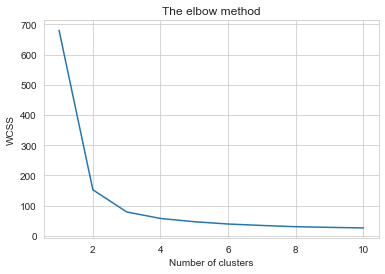

In [48]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()


From the above graph, the optimimum no. of clusters is k=3 since the elbow occurs there.
This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

In [49]:
# Creating K-Means classifier 

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)


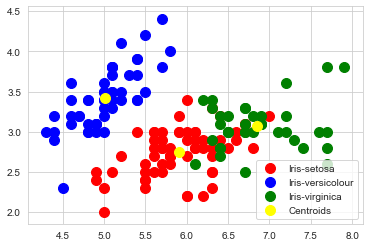

In [50]:
# Visualizing the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()